# Pair Programming 26/05 Regresión lineal simple II - Tatiana y Guada

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ejercicio 1 
Realizar de nuevo el ajuste lineal con los mismos datos y parámetros utilizados en la lección anterior.


In [2]:
df = pd.read_csv("df_elegido.csv", index_col=0)
df.head()

,capital-gain,hours-per-week
0,2174,40
1,0,13
2,0,40
3,0,40
4,0,40


In [3]:
x=df["capital-gain"].values.reshape(-1, 1) # Le hacemos el reshape ya que el modelo espera que le pasemos un array de 2 dimensiones con una única columna.Es la variable dependiente
y= df["hours-per-week"].values.reshape(-1, 1) # La variable independiente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

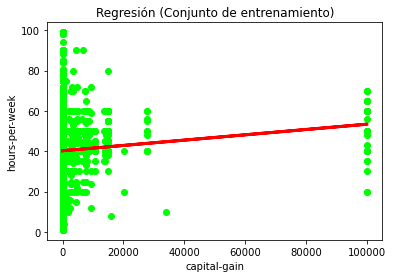

In [4]:
plt.scatter(x_test,y_test,color="lime")  # Plot a graph with X_train vs y_train
plt.plot(x_test,y_prediction,color="red", linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel("capital-gain")
plt.ylabel("hours-per-week")
plt.show()

# Ejercicio 2
Realizar un estudio de las asunciones de linealidad para los resultados obtenidos de nuestra regresión lineal simple.

👩🏻👩🏻‍🦰💬

En este caso resulta bastante evidente que aunque se intentase trazar una línea recta entre la nube de puntos, no podríamos decir que tuviera una tendencia lineal. Por lo tanto queda confirmado el **no cumplimiento del principio de linealidad** y no tendría sentido ninguno realizar un ajuste lineal para estas variables.

In [5]:
residuals = (y_test - y_prediction)


## Supuesto de independencia

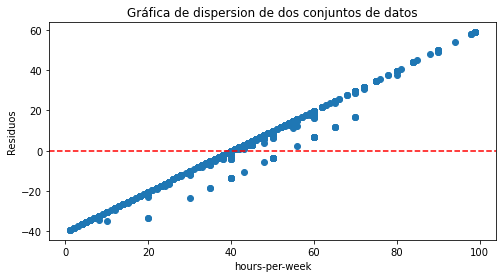

In [6]:
fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_test , y=residuals)
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="red",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('hours-per-week')
ax.set_ylabel('Residuos')
plt.show()


👩🏻👩🏻‍🦰💬

Con el supuesto de independecia se espera que los residuos sean independientes entre sí y constituyan una variable aleatoria. Como observamos en nuestra gráfica, nuestros residuos siguen juntos, por lo que no siguen este supuesto.

## Supuesto de homocedasticidad

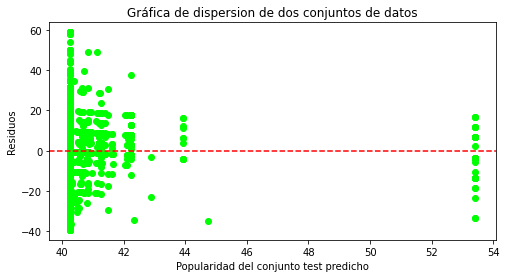

In [10]:
# 3. Homocedasticidad

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_prediction , y=residuals, color='lime')
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="red",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Popularidad del conjunto test predicho')
ax.set_ylabel('Residuos')
plt.show()

👩🏻👩🏻‍🦰💬

La homocedasticidad implica que para cada valor de la variable independiente, la varianza de sus residuos es constante. Podemos observar que nuestros valores son distintos a ambos lado, por lo que este principio no se cumple.

Para que llegase a cumplirse, deberiamos optar por estas opciones:
1. Transformar la variable dependiente:
    - Aplicando logaritmo
    - Aplicando la raiz cuadrada
2. Redefinir la variable dependiente, por ejemplo utilizando un ratio de la variable, en lugar de los valores originales
3. Aplicar una regresión lineal pesada. En este caso se le asigna un peso a cada valor, basado en la varianza de su valor ajustado. De forma que los valores con varianzas más altas tienen pesos más pequeós. Lo cual hace que los residuos disminuyan.

/home/guadalupec/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


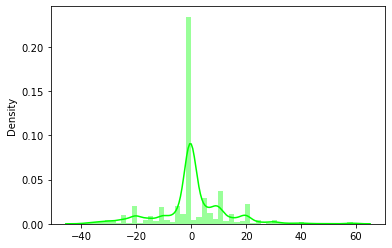

/home/guadalupec/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/home/guadalupec/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


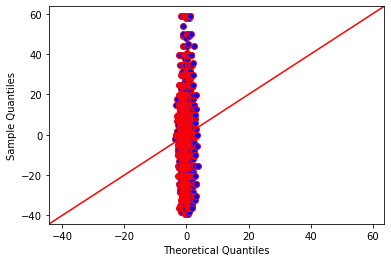

In [11]:
# 4. Normalidad

fig = plt.figure()
sns.distplot(residuals, color='lime')
plt.show()
sm.qqplot(residuals, line = '45', color='red')
py.show()

👩🏻👩🏻‍🦰💬

En el principio de normalidad se espera que para cada valor de la variable independiente, sus residuos se distribuyan normalmente con media cero. En la primera gráfica podemos observar que los valores oscilan entre -20 y 20, por lo que no lo cumple. Sin embargo, la segunda variable si tiene sus residuos con media de cero, asi que cumple este principio.

# Ejercicio 3
Interpretación de los resultados. Ahora interpreta los resultados obtenidos del estudio de las asunciones de linealidad del ajuste lineal simple y explica lo mejor posible los resultados obtenidos, así como si se cumple o se incumple algunas de las asunciones de linealidad.

👩🏻👩🏻‍🦰💬

Hemos ido interpretando cada uno de los resultados debajo de su correspondiente gráfica.